In [6]:
%matplotlib inline

## Imports and Testing

In [7]:
from pandas import *
import pandas
import numpy as np
import matplotlib.pyplot as plt

def side_by_side(*objs, **kwds):
    from pandas.core.common import adjoin
    space = kwds.get('space', 4)
    reprs = [repr(obj).split('\n') for obj in objs]
    print(adjoin(space, *reprs))

plt.rc('figure', figsize=(10, 6))
# pandas.set_printoptions(notebook_repr_html=False)

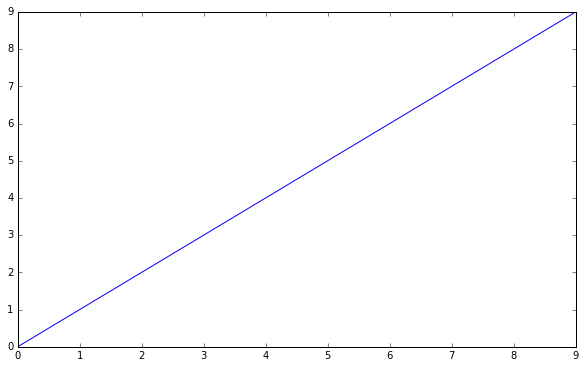

In [8]:
plt.plot(np.arange(10))
plt.show()

## Introduction to pandas objects

In [12]:
labels = ['a', 'b', 'c', 'd', 'e']
s = Series(np.random.randn(5), index=labels)

In [13]:
'b' in s

True

In [14]:
s['b']

1.4822865100821594

In [15]:
mapping = s.to_dict()
mapping

{'a': -0.52576581809519707,
 'b': 1.4822865100821594,
 'c': -0.64906036773783693,
 'd': 1.1222657004860208,
 'e': 0.39218827082236257}

In [16]:
s = Series(mapping, index=['b', 'e', 'a', 'd', 'f'])
s

b    1.482287
e    0.392188
a   -0.525766
d    1.122266
f         NaN
dtype: float64

In [17]:
isnull(s)

b    False
e    False
a    False
d    False
f     True
dtype: bool

In [18]:
isnan(s)

NameError: name 'isnan' is not defined

In [19]:
s[notnull(s)]

b    1.482287
e    0.392188
a   -0.525766
d    1.122266
dtype: float64

In [20]:
df = DataFrame({'a': np.random.randn(6), 'b': ['foo', 'bar']*3, 'c': np.random.randn(6)})
df['d'] = range(6)

In [21]:
df

,a,b,c,d
0,-0.898248,foo,-0.211149,0
1,0.853249,bar,0.530457,1
2,-0.228480,foo,-0.554909,2
3,0.995448,bar,-1.698758,3
4,-0.901662,foo,0.293622,4
5,-0.155996,bar,0.049112,5


In [22]:
df[1:3]

,a,b,c,d
1,0.853249,bar,0.530457,1
2,-0.228480,foo,-0.554909,2


In [23]:
df.xs(0)

a   -0.898248
b         foo
c   -0.211149
d           0
Name: 0, dtype: object

### Fancy indexing options

In [24]:
df.ix

In [25]:
df['c'][2]

-0.55490867608300265

In [26]:
df.ix[4:2, 'b':'c']#df.ix[2:4, 'c':'b']

,b,c


In [27]:
df[df['c'] > 0]

,a,b,c,d
1,0.853249,bar,0.530457,1
4,-0.901662,foo,0.293622,4
5,-0.155996,bar,0.049112,5


### Dicts as index

In [28]:
df = DataFrame({1:'blah', 2:'bpo'}, [1,2])

In [31]:
df

,1,2
1,blah,bpo
2,blah,bpo


# READING from files



In [32]:
close_px = read_csv('stock_data.csv', index_col=0, parse_dates=True)

In [33]:
!head -n 10 stock_data.csv

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
2007-10-29 00:00:00,37.41,185.09,34.46,106.78,57.13,31.78,65.67,1540.98,85.51
2007-10-30 00:00:00,36.43,187.0,34.39,106.15,56.99,32.7,65.8,1531.02,83.25
2007-10-31 00:00:00,36.79,189.95,34.97,108.01,57.3,33.84,65.69,1549.38,84.03
2007-11-01 00:00:00,35.22,187.44,34.27,105.72,56.85,34.07,64.51,1508.44,80.84
2007-11-02 00:00:00,35.83,187.87,34.27,106.59,56.95,34.07,65.03,1509.65,80.32
2007-11-05 00:00:00,35.22,186.18,34.15,105.48,56.7,33.77,64.84,1502.17,80.07
2007-11-06 00:00:00,35.84,191.79,34.14,105.27,56.8,33.47,65.49,1520.27,82.56
2007-11-07 00:00:00,34.76,186.3,33.2,103.69,56.19,32.65,64.46,1475.62,79.96
2007-11-08 00:00:00,35.0,175.47,33.15,99.05,56.79,31.94,65.5,1474.77,82.0


In [35]:
close_px

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
2007-10-29,37.41,185.09,34.46,106.78,57.13,31.78,65.67,1540.98,85.51
2007-10-30,36.43,187.00,34.39,106.15,56.99,32.70,65.80,1531.02,83.25
2007-10-31,36.79,189.95,34.97,108.01,57.30,33.84,65.69,1549.38,84.03
2007-11-01,35.22,187.44,34.27,105.72,56.85,34.07,64.51,1508.44,80.84
2007-11-02,35.83,187.87,34.27,106.59,56.95,34.07,65.03,1509.65,80.32
2007-11-05,35.22,186.18,34.15,105.48,56.70,33.77,64.84,1502.17,80.07
2007-11-06,35.84,191.79,34.14,105.27,56.80,33.47,65.49,1520.27,82.56
2007-11-07,34.76,186.30,33.20,103.69,56.19,32.65,64.46,1475.62,79.96
2007-11-08,35.00,175.47,33.15,99.05,56.79,31.94,65.50,1474.77,82.00
2007-11-09,34.47,165.37,32.61,93.58,57.29,31.01,65.48,1453.70,79.64


In [36]:
close_px['AAPL'][-20:]

2011-09-19    411.63
2011-09-20    413.45
2011-09-21    412.14
2011-09-22    401.82
2011-09-23    404.30
2011-09-26    403.17
2011-09-27    399.26
2011-09-28    397.01
2011-09-29    390.57
2011-09-30    381.32
2011-10-03    374.60
2011-10-04    372.50
2011-10-05    378.25
2011-10-06    377.37
2011-10-07    369.80
2011-10-10    388.81
2011-10-11    400.29
2011-10-12    402.19
2011-10-13    408.43
2011-10-14    422.00
Name: AAPL, dtype: float64

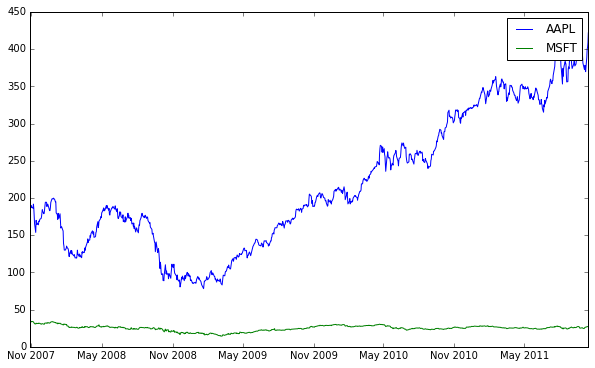

In [38]:
plt.plot(close_px['AAPL'], label='AAPL')#:'MSFT'])
plt.plot.hold = True
plt.plot(close_px['MSFT'], label='MSFT')
plt.legend()

In [41]:
s1 = close_px[20:30]['AAPL']
s2 = close_px[25:40]['AAPL']

In [44]:
print(s1+s2)
(s1+s2).dropna()

2007-11-27       NaN
2007-11-28       NaN
2007-11-29       NaN
2007-11-30       NaN
2007-12-03       NaN
2007-12-04    359.62
2007-12-05    371.00
2007-12-06    379.90
2007-12-07    388.60
2007-12-10    388.42
2007-12-11       NaN
2007-12-12       NaN
2007-12-13       NaN
2007-12-14       NaN
2007-12-17       NaN
2007-12-18       NaN
2007-12-19       NaN
2007-12-20       NaN
2007-12-21       NaN
2007-12-24       NaN
Name: AAPL, dtype: float64


2007-12-04    359.62
2007-12-05    371.00
2007-12-06    379.90
2007-12-07    388.60
2007-12-10    388.42
Name: AAPL, dtype: float64

## Function application

In [48]:
close_px.mean()
# close_px.apply(np.mean, axis=1)

AA        17.13819
AAPL     217.38695
GE        18.36225
IBM      122.68701
JNJ       58.22890
MSFT      24.94784
PEP       59.60793
SPX     1153.72909
XOM       71.51370
dtype: float64

In [49]:
close_px.AAPL.idxmax()

Timestamp('2011-10-14 00:00:00')

In [50]:
def peak_date(series):
    return series.idxmax()
close_px.apply(peak_date)

AA     2008-05-19
AAPL   2011-10-14
GE     2007-10-31
IBM    2011-10-14
JNJ    2011-07-07
MSFT   2007-11-01
PEP    2008-01-10
SPX    2007-10-31
XOM    2008-05-20
dtype: datetime64[ns]

## Plotting inbuilt

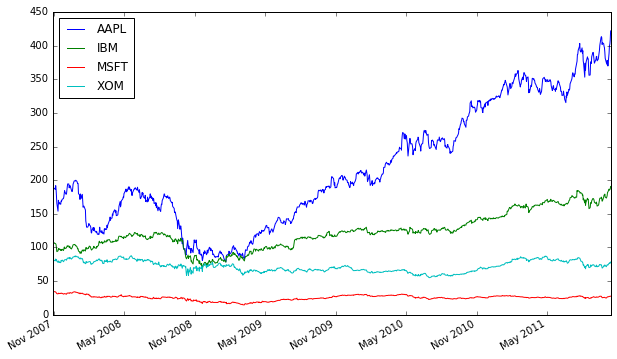

In [52]:
close_px[['AAPL', 'IBM', 'MSFT', 'XOM']].plot()

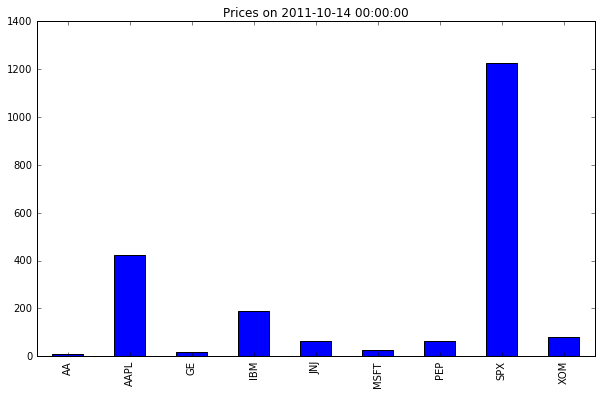

In [57]:
close_px.ix[-1].plot(kind='bar')
plt.title('Prices on {}'.format(close_px.index[-1]))